                                                            FACIAL DETECTION

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def show(img,cma=['gray']):
    fig=plt.figure(figsize=(9,7))
    ax=fig.add_subplot(111)
    ax.imshow(img,*cma)

In [2]:
nadia=cv2.imread(r'Computer-Vision-with-Python\DATA\Nadia_Murad.jpg',0)
denis=cv2.imread(r'Computer-Vision-with-Python\DATA\Denis_Mukwege.jpg',0)
solvay=cv2.imread(r'Computer-Vision-with-Python\DATA\solvay_conference.jpg',0)

In [3]:
facefront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')

In [4]:
def detectface(img):
    
    face=img.copy()
    face_sqrs=facefront.detectMultiScale(face)
    print(len(face_sqrs))
    for x,y,w,h in face_sqrs:
        cv2.rectangle(face,(x,y),(x+w,y+h),[255]*3,3)
        
    return face

def show(img,cma=['gray']):
    fig=plt.figure(figsize=(9,7))
    ax=fig.add_subplot(111)
    ax.imshow(img,*cma)

34


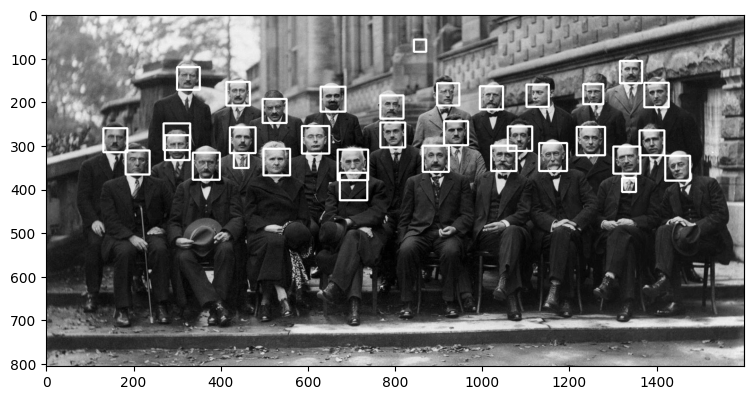

In [5]:
res=detectface(solvay)
show(res)

31


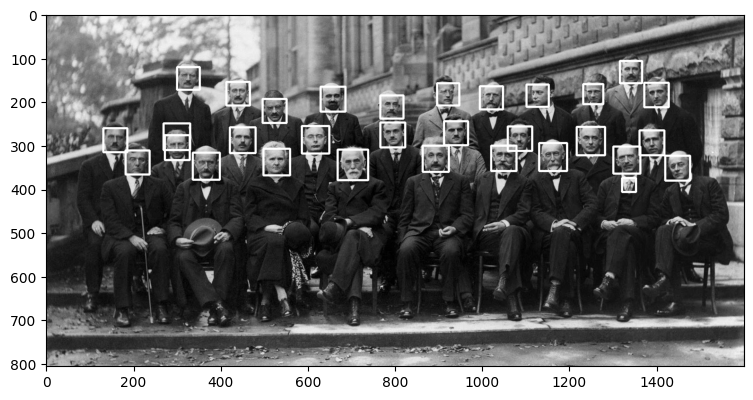

In [6]:
def v2detectface(img):
    
    face=img.copy()
    face_sqrs=facefront.detectMultiScale(face,scaleFactor=1.1,minNeighbors=5)
    print(len(face_sqrs))
    for x,y,w,h in face_sqrs:
        cv2.rectangle(face,(x,y),(x+w,y+h),[255]*3,3)
        
    return face
res=v2detectface(solvay)
show(res)


31


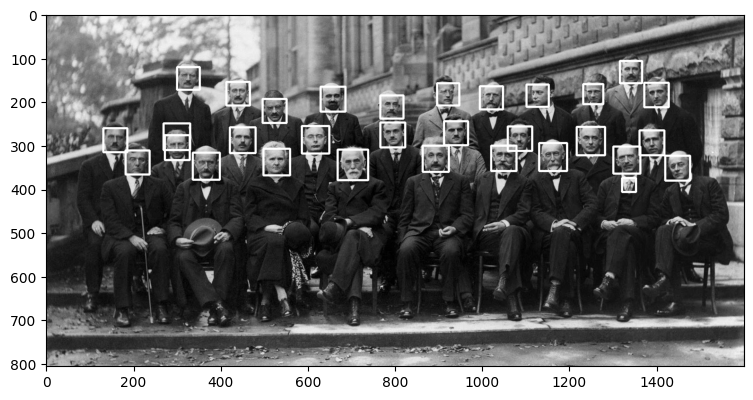

In [7]:
res=v2detectface(solvay)
show(res)

In [9]:
eyesfront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_eye.xml')
def detecteyes(img):
    
    eyes=img.copy()
    eyes_sqrs=eyesfront.detectMultiScale(eyes)
    # print(len(eyes_sqrs))
    for x,y,w,h in eyes_sqrs:
        cv2.rectangle(eyes,(x,y),(x+w,y+h),[255]*3,3)
        
    return eyes



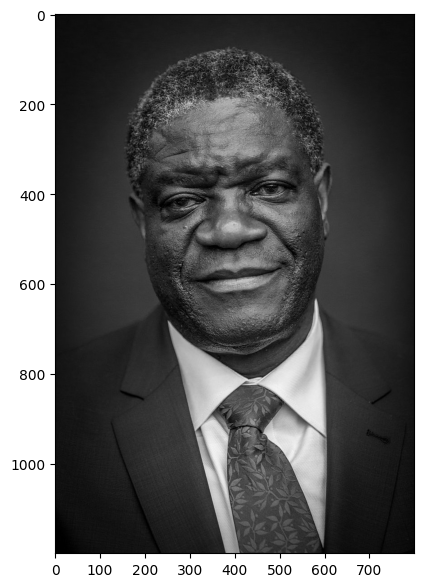

In [10]:
res=detecteyes(denis)
show(res)

In [11]:
cap=cv2.VideoCapture(0)
facefront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')

while True:
    ret,frame=cap.read(0)
    
    frame=detecteyes(frame)
    cv2.imshow('cam',frame)
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
facefront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')
def faceblur(img):
    faceimg=img.copy()
    facecoords=facefront.detectMultiScale(faceimg,1.5)
    
    for x,y,w,h in facecoords:
        # print(x,y,w,h)
        face=faceimg[y:y+h,x:x+w]
        faceimg[y:y+h,x:x+w]=cv2.blur(face,ksize=(30,30))
        # show(plate)
        
        # bluplate=cv2.blur(plate,ksize=(10,10))
        
        # faceimg[x:(x+w),y:(y+h)]=cv2.blur(plate,ksize=(76,76))
        
    return faceimg       

In [13]:
cap=cv2.VideoCapture(0)
facefront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')

while True:
    ret,frame=cap.read(0)
    
    frame=faceblur(frame)
    cv2.imshow('cam',frame)
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

                                                        DETECTION AASIGMENT

#detetct plates

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def show(img,cma=['gray']):
    fig=plt.figure(figsize=(9,7))
    ax=fig.add_subplot(111)
    ax.imshow(img,*cma)

416 224 90 30


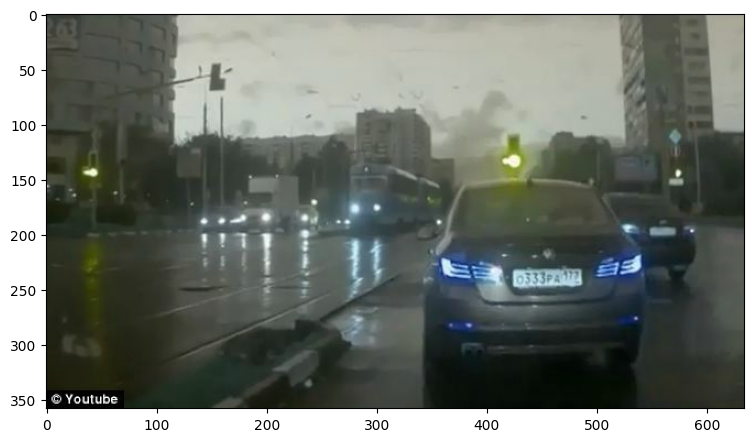

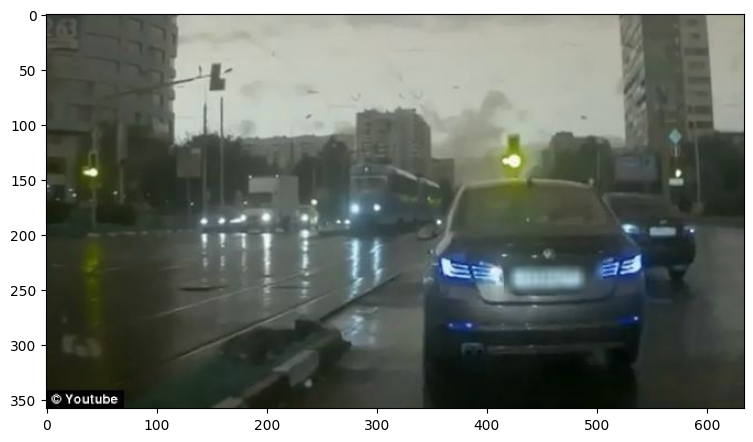

In [15]:
platedet=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_russian_plate_number.xml')
russianplate=cv2.imread(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\car_plate.jpg')
def plateblur(img):
    plateimg=img.copy()
    platecoords=platedet.detectMultiScale(plateimg,1.5)
    
    for x,y,w,h in platecoords:
        print(x,y,w,h)
        plate=plateimg[y:y+h,x:x+w]
        plateimg[y:y+h,x:x+w]=cv2.blur(plate,ksize=(9,9))
        # show(plate)
        
        # bluplate=cv2.blur(plate,ksize=(10,10))
        
        # plateimg[x:(x+w),y:(y+h)]=cv2.blur(plate,ksize=(76,76))
        
    return plateimg       

show(russianplate)
blurredrusian=plateblur(russianplate)
show(blurredrusian) 
    

                                                                                    OBJEST TRACKING

                                                                                            OPTICAL FLOW

USES LUCAS KANADE
lucas kanade computes for a sparse feature set
only poointss it was told to track

user gunner farnebacks t ocalc optical dense flow
dense optical flow will trac kall points

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def show(img,cma='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cma)

In [17]:
corner_track_params=dict(maxCorners=10,qualityLevel=0.01,minDistance=7,blockSize=7)
lk_params=dict(winSize=(10,10),maxLevel=2,
               criteria=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,0.03))
inp=r"D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\finger_move.mp4"
inp=0
inp=r'D:\zaynu\Documents\pythonfiles\CV_mod\foler_w_vids\checkers_moving.mp4'
inp=r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\finger_move.mp4'
#small window is more sensitive to noise so larger movements may be missed so fast movements are hard to see
#larger isnt as sensitive to small movements
cap=cv2.VideoCapture(inp)
ret,pre_frame=cap.read()
# pre_frame=cv2.imread(r".\imagestouse\checkersboard.jpg")
# show(pre_frame)
prev_gray=cv2.cvtColor(pre_frame,cv2.COLOR_BGR2GRAY)
prev_p=cv2.goodFeaturesToTrack(prev_gray,mask=None,**corner_track_params)


# prev_p=cv2.goodFeaturesToTrack(prev_gray,64,0.3,10)
# prev_p=np.astype(prev_p,int)
# for i in prev_p:
#     x,y=i.ravel()
#     cv2.circle(pre_frame,(x,y),7,(0,255,0),-1)
# show(pre_frame)
    

mask=np.zeros_like(pre_frame)
while True:
    ret,frame=cap.read()
    gframe=cv2.cvtColor(pre_frame,cv2.COLOR_BGR2GRAY)
    nextPts,status,err=cv2.calcOpticalFlowPyrLK(prev_gray,gframe,prev_p,None,**lk_params)
    
    goodnew=nextPts[status==1]
    goodprev=prev_p[status==1]
    for i ,(new,prev) in enumerate(zip(goodnew,goodprev)):
        new=np.astype(new,np.int32)
        prev=np.astype(prev,np.int32)
        
        x_new,y_new=new.ravel()
        x_prev,y_prev=prev.ravel()
        
        # print((x_new),(y_new))
        # print((x_new,y_new))
        mask=cv2.line(mask,(x_new,y_new),(x_prev,y_prev),(0,255,0),3)
        frame=cv2.circle(frame,(x_new,y_new),8,(0,0,255),-1)
    
    img=cv2.add(frame,mask)
        
    cv2.imshow("track",img)
    
    if cv2.waitKey(30)==ord('q'):
        break
    
    prev_gray=gframe.copy()
    prev_p=goodnew.reshape(-1,1,2 ) 
    
cap.release()
cv2.destroyAllWindows()

In [8]:
# Capture the video
corner_track_params=dict(maxCorners=10,qualityLevel=0.01,minDistance=7,blockSize=7)
lk_params=dict(winSize=(10,10),maxLevel=2,
               criteria=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,0.03))

inp=0
inp=r'D:\zaynu\Documents\pythonfiles\CV_mod\foler_w_vids\checkers_moving.mp4'
cap = cv2.VideoCapture(inp)

# Grab the very first frame of the stream
ret, prev_frame = cap.read()

# Grab a grayscale image (We will refer to this as the previous frame)
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Grabbing the corners
prevPts = cv2.goodFeaturesToTrack(prev_gray, mask = None, **corner_track_params)

# Create a matching mask of the previous frame for drawing on later
mask = np.zeros_like(prev_frame)


while True:
    
    # Grab current frame
    ret,frame = cap.read()
    
    # Grab gray scale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the Optical Flow on the Gray Scale Frame
    nextPts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, frame_gray, prevPts, None, **lk_params)
    
    # Using the returned status array (the status output)
    # status output status vector (of unsigned chars); each element of the vector is set to 1 if
    # the flow for the corresponding features has been found, otherwise, it is set to 0.
    good_new = nextPts[status==1]
    good_prev = prevPts[status==1]
    
    # Use ravel to get points to draw lines and circles
    for i,(new,prev) in enumerate(zip(good_new,good_prev)):
        
        new=np.int32(new)
        prev=np.int32(prev)

        
        x_new,y_new = new.ravel()
        x_prev,y_prev = prev.ravel()
        
        # Lines will be drawn using the mask created from the first frame
        mask = cv2.line(mask, (x_new,y_new),(x_prev,y_prev), (0,255,0), 3)
        
        # Draw red circles at corner points
        frame = cv2.circle(frame,(x_new,y_new),8,(0,0,255),-1)
    
    # Display the image along with the mask we drew the line on.
    img = cv2.add(frame,mask)
    cv2.imshow('frame',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
   
    # Now update the previous frame and previous points
    prev_gray = frame_gray.copy()
    prevPts = good_new.reshape(-1,1,2)
    
    
cv2.destroyAllWindows()
cap.release()

                    <!-- OPTICLA FLOW PART 2 -->

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def show(img,cma='gray'):
    
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cma)

In [10]:
cap=cv2.VideoCapture(0)
_ , frame=cap.read()

primg=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
hsv_mask=np.zeros_like(frame)
hsv_mask[:,:,1]=255

while True:
    
    _ , frame2=cap.read()
    
    nxtimg=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    
    flow=cv2.calcOpticalFlowFarneback(primg,nxtimg,None,0.5,3,15,3,5,1.2,0)
    # show(flow)
    #pyr 0.5 means classical pyramid each layer is half tthe size of the previous
    #1 layer means no extra layer and only original images are used 
    #sinzisze averaging window size
    #larger values increase algorithm robustness t onoise and more chances of fast detectiion 
    #iterations is number of iterations per pyramid
    #polynsize is size fof the pixel neighbourhood to find polynomial expansion of each pixel
    # larger values means image aproximated with smoother surfaces ,poln= usually 5 or 7
    #poly isgma is standard deviation used to smooth derivatives used in bascis for the polynmial expansion 
    #for polyn=5 polysigma can be = 1 for poln=7 , sigma=1.5
    
    '''
        HSV first layer is hue ,angles 0 is red 120 green 240 blue
        HSV second layer is saturation intensity of purity of oclour or amount of gray mixed ,0% is gray ,100% is pure colour
        HSB third layer value is magnitude ,represents brightness 0 being black 100 is full
    '''
    
    mag ,ang = cv2.cartToPolar(flow[:,:,0],flow[:,:,1],angleInDegrees=True)
    print(mag.shape,'\n\n',ang.shape,flow.shape,frame.shape)
    print(flow)
    hsv_mask[:,:,0]=ang/2
    hsv_mask[:,:,2]=cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr=cv2.cvtColor(hsv_mask,cv2.COLOR_HSV2BGR)
    cv2.imshow('frame',bgr)
    
    # primg=nxtimg
     
    # break
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(480, 640) 

 (480, 640) (480, 640, 2) (480, 640, 3)
[[[-5.19434065e-02  1.35836035e-01]
  [-7.48666748e-02  1.51128903e-01]
  [-7.59811699e-02  1.62187114e-01]
  ...
  [-7.20756943e-04 -1.77714403e-03]
  [-6.82471378e-04 -1.31921261e-03]
  [-6.31388917e-04 -8.36463354e-04]]

 [[-2.56784931e-02  8.29086378e-02]
  [-5.00763729e-02  9.13558677e-02]
  [-5.13403825e-02  1.17829390e-01]
  ...
  [-1.77642691e-03 -6.22792589e-03]
  [-1.50295149e-03 -4.24978230e-03]
  [-1.40115444e-03 -3.17455363e-03]]

 [[ 1.45407328e-02  7.48515725e-02]
  [-1.78286955e-02  7.05076009e-02]
  [-1.56054366e-02  1.22768596e-01]
  ...
  [-3.77710373e-03 -1.45517904e-02]
  [-3.17784958e-03 -9.84293595e-03]
  [-2.56649312e-03 -6.55683223e-03]]

 ...

 [[-1.49283413e-04 -1.41279161e-04]
  [-4.09984961e-04 -2.80802778e-05]
  [-8.83059809e-04  1.91239131e-04]
  ...
  [ 1.69287041e-01 -1.99787207e-02]
  [ 1.52799234e-01 -2.08059531e-02]
  [ 1.07955426e-01 -1.56257208e-02]]

 [[-1.00651938e-04 -1.06153995e-04]
  [-2.759

                                                                                        MEANSHIFT

In [11]:
import numpy as np
import cv2

In [12]:
cap=cv2.VideoCapture(0)
_ , frame=cap.read()
facefront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')
face_rects=facefront.detectMultiScale(frame)
(f_x, f_y, w, h)=tuple(face_rects[0])
track_window=(f_x,f_y,w,h)

roi=frame[f_y:f_y+h,f_x:f_x+w]
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist=cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT ,10,1)

while True:
    
    ret , frame= cap.read()
    
    if ret:
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        
        dst=cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        '''
            Back projection determines how well each pixel in an image fits into the histogram model. It essentially calculates 
            the probability of a pixel belonging to the distribution represented by the histogram.
        
        '''
        
        ret, track_window= cv2.meanShift(dst,track_window,term_criteria)
        x,y,w,h=track_window
        
        img2=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),6)
        
        cv2.imshow('image',img2)
        
        if cv2.waitKey(1)== ord('q'):
            break
    else:
        break
        

cv2.destroyAllWindows()
cap.release( )
        
        
        
    

                                                CAM SHIFT

In [17]:
cap=cv2.VideoCapture(0)
_ , frame=cap.read()
facefront=cv2.CascadeClassifier(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')
face_rects=facefront.detectMultiScale(frame)
(f_x, f_y, w, h)=tuple(face_rects[0])
track_window=(f_x,f_y,w,h)

roi=frame[f_y:f_y+h,f_x:f_x+w]
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist=cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT ,10,1)

while True:
    
    ret , frame= cap.read()
    
    if ret:
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        
        dst=cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        '''
            Back projection determines how well each pixel in an image fits into the histogram model. It essentially calculates 
            the probability of a pixel belonging to the distribution represented by the histogram.
        
        '''
        #----------------------------------------------------------------------------------------------------------------------------------------------------
        # ret, track_window= cv2.meanShift(dst,track_window,term_criteria)
        # x,y,w,h=track_window
        # img2=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),6)
        
        ret, track_window=cv2.CamShift(dst,track_window,term_criteria)
        pts=cv2.boxPoints(ret)
        pts=np.int_(pts)
        img2=cv2.polylines(frame,[pts],True,(0,255,0),5)
        
        
        
        #----------------------------------------------------------------------------------------------------------------------------------------------------
        
        cv2.imshow('image',img2)
        
        if cv2.waitKey(1)== ord('q'):
            break
    else:
        break
        

cv2.destroyAllWindows()
cap.release( )
        
        
        
    

                                OBJECT TRACKING APIS


1 boosting tracker
evaluates many times ascross multiple frames

    pros
        very well known adn wekll studied
        
    cons
        does not know when tracking failed
        and newer better techniques now exist

2 MIL tracker
uses a neighbourhood of points around

    pros
        good performance and not as much drifting
    
    cons
        failure to track object MAY not be reported back
        cant recover from full obstruction
    
3 KCF tracker 
exploits key point of MIL uses overlaping data points to perform better

    pro
        better than boosting and MIL
        great first choice and should be ur first atemppt
        
    cons:
        cant recover from full obstruction sometimes

4 TLD 
follows obj frame to frame estimates detectors errorss and updates to avoid erros in future

    pro
        good at tracking even with obstruction in frames
        tracks well under large changes in scale
    
    cons
        can provide many false postivies    

5 median flow tracker
tracks objext in foward as well as backward in time and measures the descrepencies between trajectories

pro
    good at reporting failing tracking
    works well with repeated predictable motion eg( car in race track)
    
cons
    fails under large motion  ie: fast moving
